<div align="center">
    <h1>Aprendizaje automático</h1>
    <h3>Fundamentos y aplicaciones en meteorología del espacio</h3>
    <h4>TP1 - Federico Iza</h4>
</div>

In [190]:
import pandas as pd
from tp1_settings import *
import matplotlib.pyplot as plt
from utils.plot import config_plots
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
import tensorflow as tf

In [142]:
%matplotlib inline
config_plots()

# Radar Signal Classification

## Data Acquisition

In [143]:
df = pd.read_csv('../data/ionosphere.data',
                 header=None)

In [144]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [145]:
df.shape

(351, 35)

In [146]:
col_names = []
for i in range(1, N_SIGNALS+1):
    for suffix in ['R', 'I']:
        col_names.append(f'F{str(i)}{suffix}')
col_names.append('Target')

df.columns = col_names

In [147]:
df.head()

,F1R,F1I,F2R,F2I,F3R,F3I,F4R,F4I,F5R,F5I,...,F13I,F14R,F14I,F15R,F15I,F16R,F16I,F17R,F17I,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Data Pre-processing

In [148]:
# Numerical data has to be used in ANNs
category_target = {'g': 1, 'b': 0}
df['Target'] = df['Target'].map(category_target)

In [149]:
df.head()

,F1R,F1I,F2R,F2I,F3R,F3I,F4R,F4I,F5R,F5I,...,F13I,F14R,F14I,F15R,F15I,F16R,F16I,F17R,F17I,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


## Feature Engineering

### Data Balance

In [150]:
data_balace = df['Target'].value_counts()
print(data_balace)

1    225
0    126
Name: Target, dtype: int64


In [151]:
# Remove data to balance dataset
counter = 99  # Remove the first 99 rows with target=1
df_aux = pd.DataFrame()
for idx, row in df.iterrows():
    if counter > 0:
        if row['Target'] == 1:
            counter -= 1
        else:
            df_aux = pd.concat([df_aux, pd.DataFrame(row).T],
                               axis=0,
                               ignore_index=True)
    else:
        df_aux = pd.concat([df_aux, pd.DataFrame(row).T],
                           axis=0,
                           ignore_index=True)

In [152]:
df_aux.shape

(252, 35)

In [153]:
df_aux

,F1R,F1I,F2R,F2I,F3R,F3I,F4R,F4I,F5R,F5I,...,F13I,F14R,F14I,F15R,F15I,F16R,F16I,F17R,F17I,Target
0,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0.0
1,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0.0
2,1.0,0.0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0.0
3,0.0,0.0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.0
4,1.0,0.0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1.0
248,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1.0
249,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1.0
250,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1.0


In [154]:
data_balace = df_aux['Target'].value_counts()
print(data_balace)

0.0    126
1.0    126
Name: Target, dtype: int64


## Data Preparation

In [155]:
features = df_aux.loc[:, df_aux.columns != 'Target']
target =  df_aux.loc[:, df_aux.columns == 'Target']

In [156]:
# Scaling analysis (if necessary)
print(features.min(), features.max())

F1R     0.0
F1I     0.0
F2R    -1.0
F2I    -1.0
F3R    -1.0
F3I    -1.0
F4R    -1.0
F4I    -1.0
F5R    -1.0
F5I    -1.0
F6R    -1.0
F6I    -1.0
F7R    -1.0
F7I    -1.0
F8R    -1.0
F8I    -1.0
F9R    -1.0
F9I    -1.0
F10R   -1.0
F10I   -1.0
F11R   -1.0
F11I   -1.0
F12R   -1.0
F12I   -1.0
F13R   -1.0
F13I   -1.0
F14R   -1.0
F14I   -1.0
F15R   -1.0
F15I   -1.0
F16R   -1.0
F16I   -1.0
F17R   -1.0
F17I   -1.0
dtype: float64 F1R     1.0
F1I     0.0
F2R     1.0
F2I     1.0
F3R     1.0
F3I     1.0
F4R     1.0
F4I     1.0
F5R     1.0
F5I     1.0
F6R     1.0
F6I     1.0
F7R     1.0
F7I     1.0
F8R     1.0
F8I     1.0
F9R     1.0
F9I     1.0
F10R    1.0
F10I    1.0
F11R    1.0
F11I    1.0
F12R    1.0
F12I    1.0
F13R    1.0
F13I    1.0
F14R    1.0
F14I    1.0
F15R    1.0
F15I    1.0
F16R    1.0
F16I    1.0
F17R    1.0
F17I    1.0
dtype: float64


## Modeling

In [157]:
(feats_train, feats_test,
 target_train, target_test) = train_test_split(features, target,
                                               test_size=TEST_SIZE)

In [158]:
input_size = feats_train.shape[1]  # Number of feat for training

In [159]:
# ANN architecture
model = Sequential()  # Instance the model

for i in range(N_LAYERS):  # Add layers
    model.add(Dense(units=N_NEURONS[i],  # Specify number of neurons
                    input_dim=input_size))  # Specify input size
    model.add(Activation(ACTIVATION_FUNCTIONS[i]))  # Add activation funcs

# Complile model
model.compile(loss=LOSS_FUNCTION,  # Select loss function
              optimizer=OPTIMIZER,  # Select optimizer
              metrics=[tf.keras.metrics.Accuracy()],  # Select metrics
              )

In [160]:
history = model.fit(feats_train, target_train,
                    epochs=N_EPOCHS,
                    validation_split=VALIDATION_SPLIT,
                    verbose=2)

Epoch 1/30
5/5 - 1s - loss: 5.3449 - accuracy: 0.4250 - val_loss: 6.8609 - val_accuracy: 0.2439 - 748ms/epoch - 150ms/step
Epoch 2/30
5/5 - 0s - loss: 4.4762 - accuracy: 0.3938 - val_loss: 2.9619 - val_accuracy: 0.1951 - 33ms/epoch - 7ms/step
Epoch 3/30
5/5 - 0s - loss: 1.0617 - accuracy: 0.1750 - val_loss: 0.7599 - val_accuracy: 0.0732 - 35ms/epoch - 7ms/step
Epoch 4/30
5/5 - 0s - loss: 0.5670 - accuracy: 0.2062 - val_loss: 1.1443 - val_accuracy: 0.1463 - 30ms/epoch - 6ms/step
Epoch 5/30
5/5 - 0s - loss: 0.6870 - accuracy: 0.2688 - val_loss: 0.8275 - val_accuracy: 0.0976 - 29ms/epoch - 6ms/step
Epoch 6/30
5/5 - 0s - loss: 0.4402 - accuracy: 0.2250 - val_loss: 0.7830 - val_accuracy: 0.0976 - 34ms/epoch - 7ms/step
Epoch 7/30
5/5 - 0s - loss: 0.4186 - accuracy: 0.2188 - val_loss: 0.7796 - val_accuracy: 0.0976 - 29ms/epoch - 6ms/step
Epoch 8/30
5/5 - 0s - loss: 0.4041 - accuracy: 0.2250 - val_loss: 0.7466 - val_accuracy: 0.0976 - 26ms/epoch - 5ms/step
Epoch 9/30
5/5 - 0s - loss: 0.3947 - 

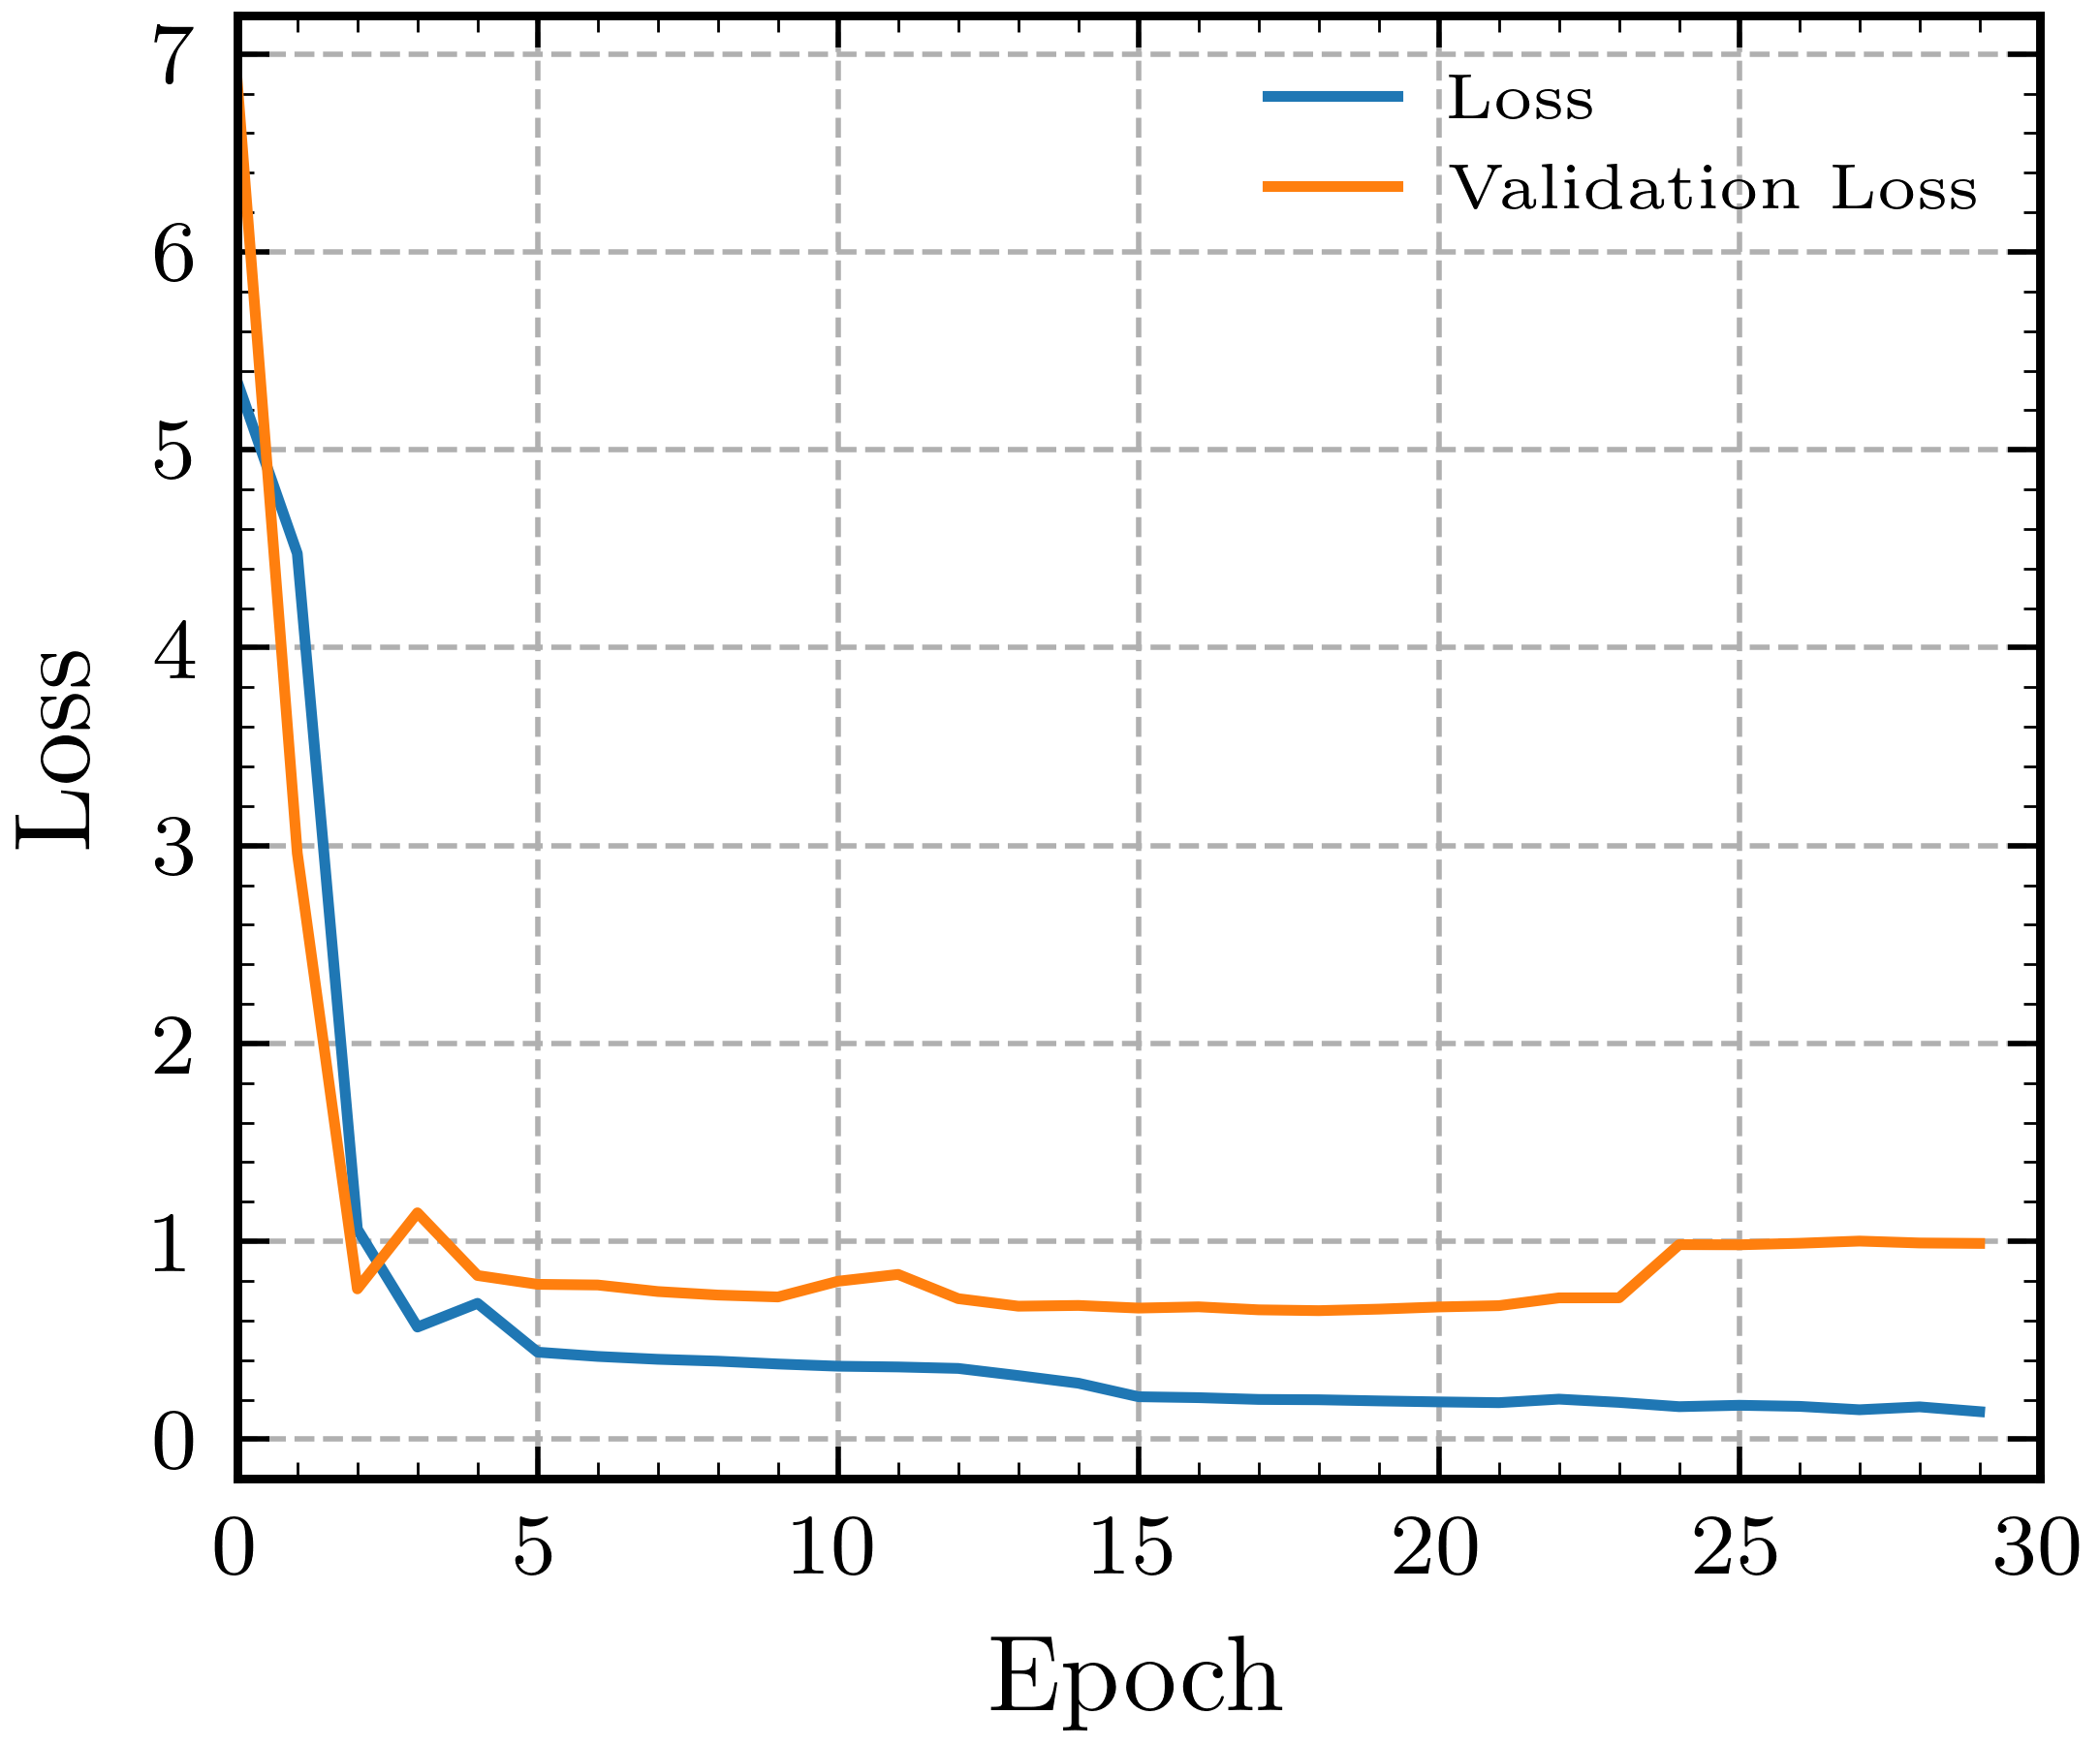

In [161]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(0, N_EPOCHS)
# ax.set_ylim(0, 5)

ax.plot(history.history['loss'], color='tab:blue',
        ls='-', lw=1, label='Loss')
ax.plot(history.history['val_loss'], color='tab:orange',
        ls='-',  lw=1, label='Validation Loss')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig1.pdf')
plt.show()

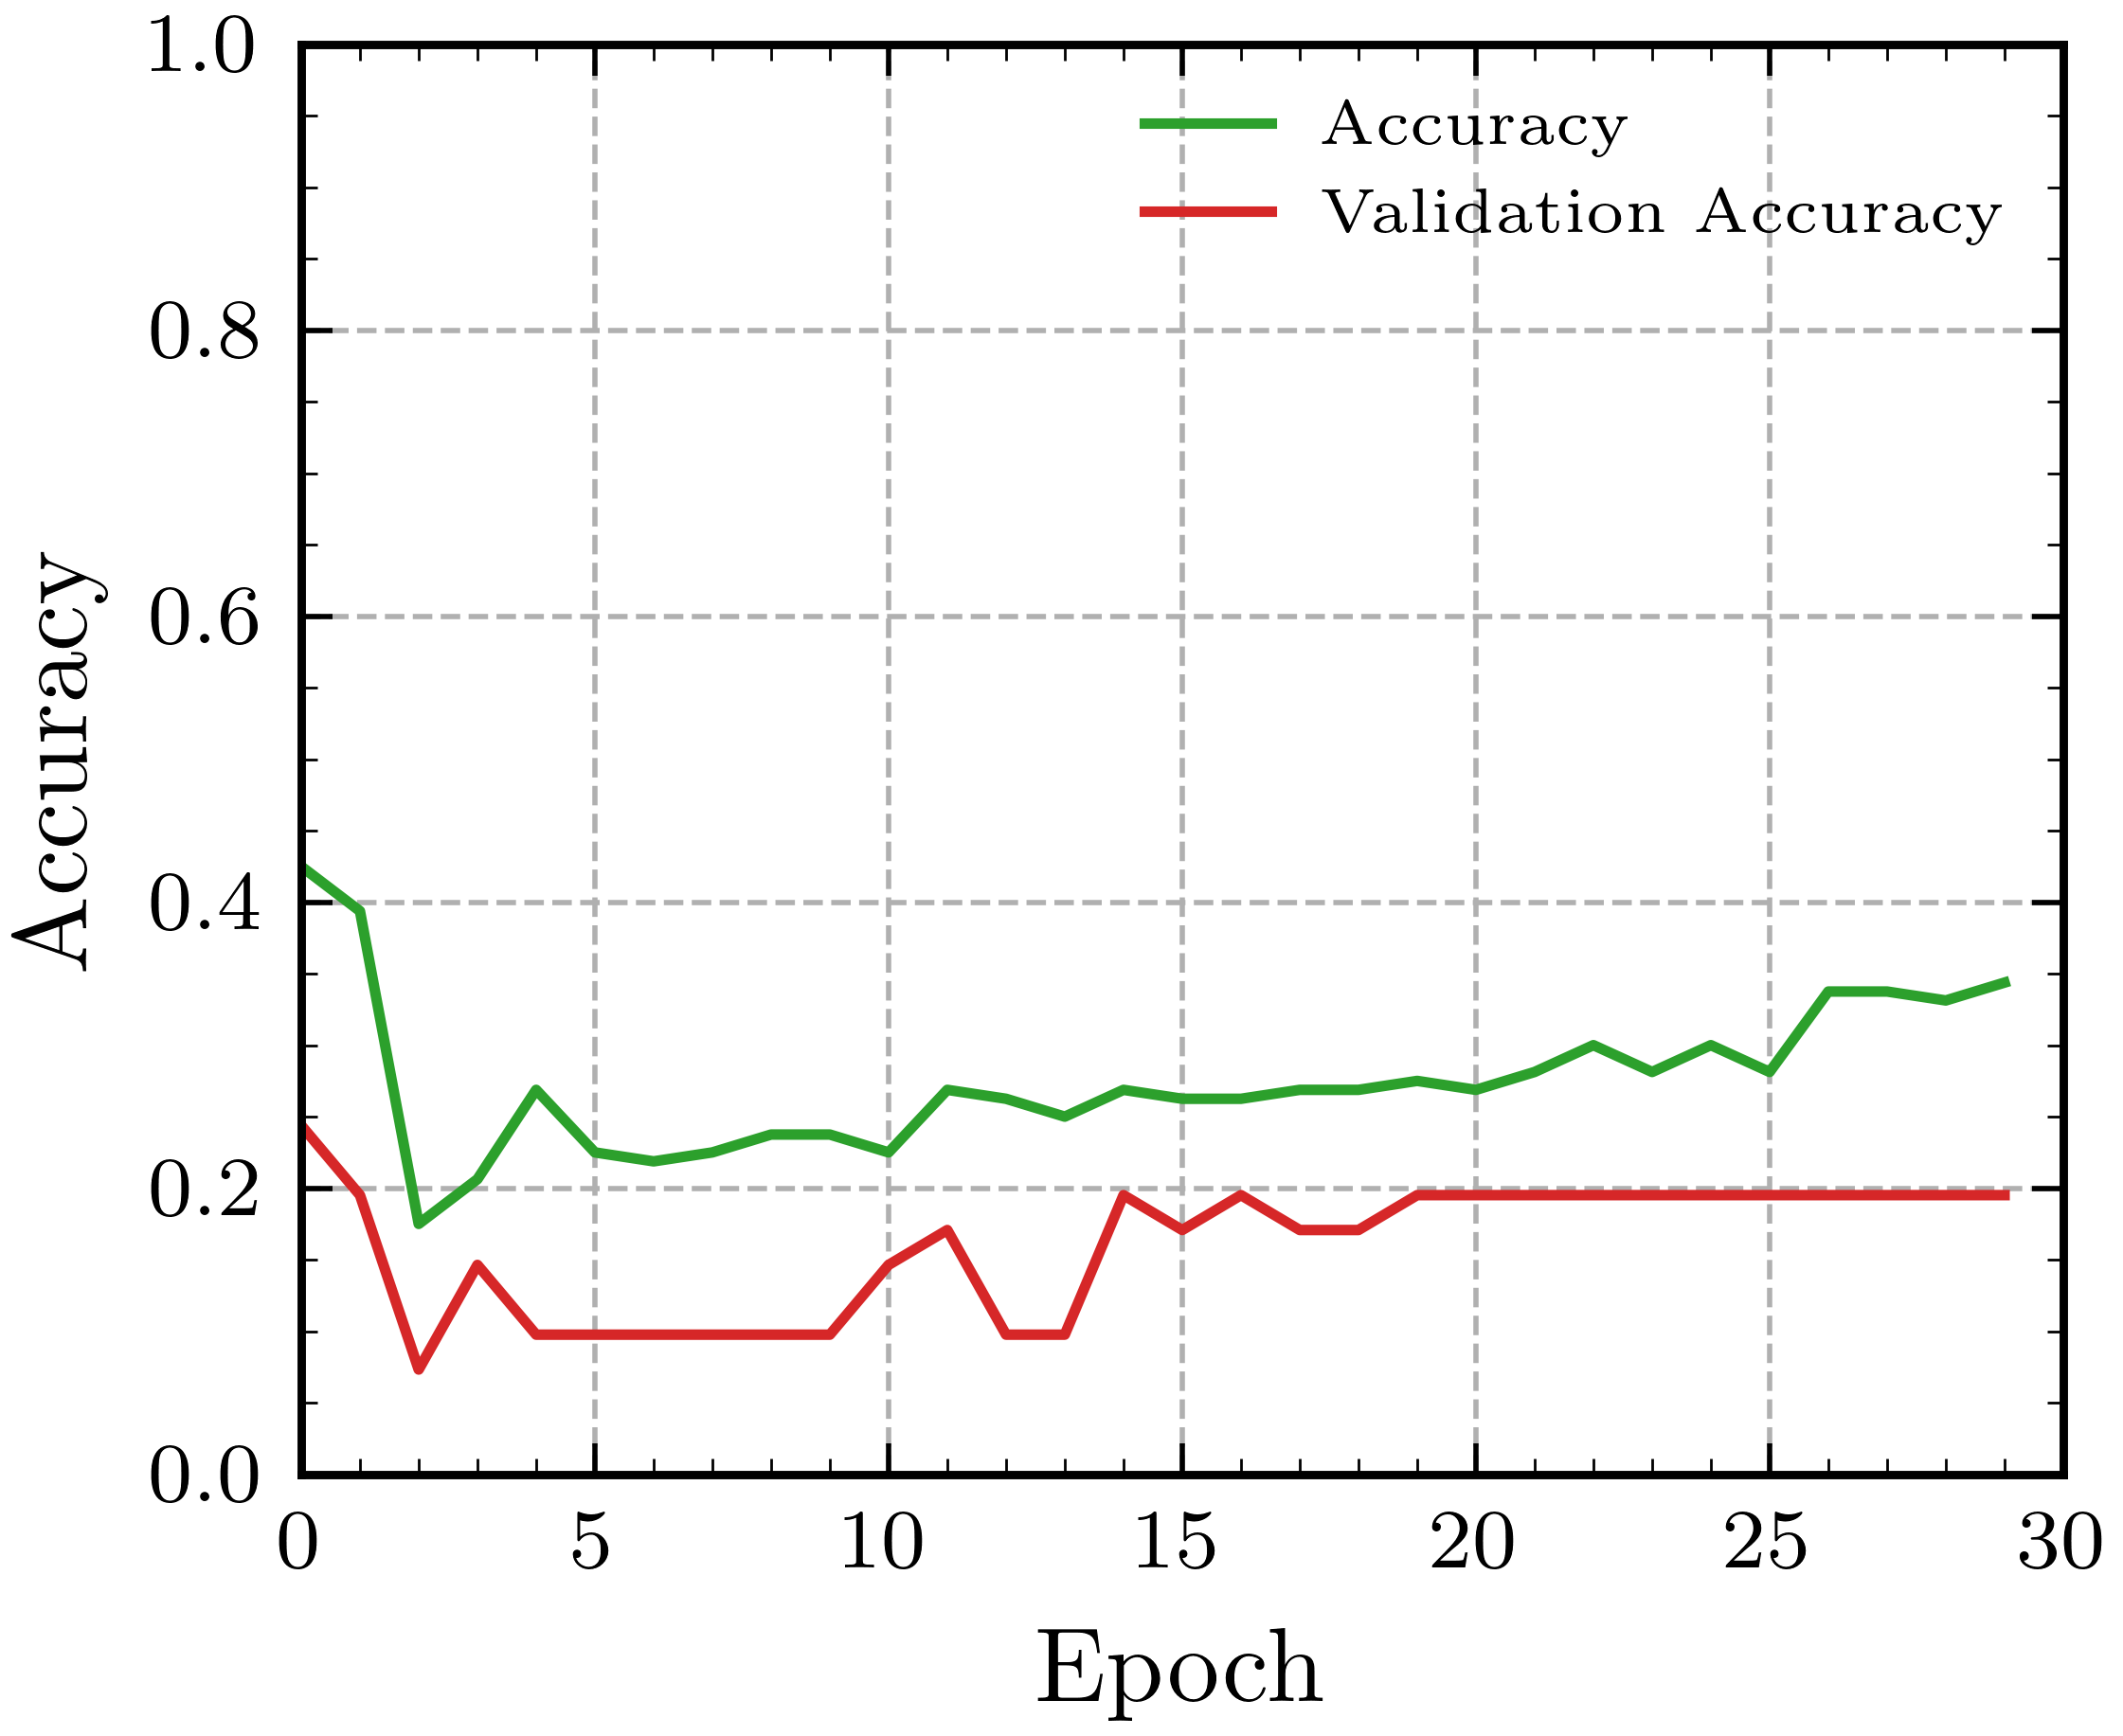

In [162]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_xlim(0, N_EPOCHS)
ax.set_ylim(0, 1)

ax.plot(history.history['accuracy'], color='tab:green',
        ls='-', lw=1, label='Accuracy')
ax.plot(history.history['val_accuracy'], color='tab:red',
        ls='-', lw=1, label='Validation Accuracy')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig2.pdf')
plt.show()

## Classification and Validation

In [163]:
y_pred = model.predict(feats_test)

2/2 [==============================] - 0s 2ms/step


In [164]:
cm = confusion_matrix(np.round(y_pred),
                      target_test,
                      labels=[0., 1.])

In [165]:
# Confusion matrix structure
# TN | FP
# FN | TP

print(cm)

[[21  1]
 [ 6 23]]


In [166]:
# print(np.diag(cm).sum() / cm.sum())
print(accuracy_score(target_test, np.round(y_pred)))

0.8627450980392157


# CMEs Classification

## Data Acquisition

In [174]:
df = pd.read_csv('../data/CMEs.csv')
df.rename(columns={'vprop': 'Velocity'}, inplace=True)

In [175]:
df.head()

,SunActivity,Velocity,Origin
0,low,592,flare
1,low,355,flare
2,low,619,flare
3,high,309,flare
4,high,1557,flare


## Data Pre-processing

In [176]:
# Numerical data has to be used in ANNs
numerical_origin = {'flare': 1, 'no flare': 0}
df['Origin'] = df['Origin'].map(numerical_origin)

numerical_activity = {'low': 0, 'high': 1}
df['SunActivity'] = df['SunActivity'].map(numerical_activity)

In [177]:
df.head()

,SunActivity,Velocity,Origin
0,0,592,1
1,0,355,1
2,0,619,1
3,1,309,1
4,1,1557,1


## Feature Engineering

### Data Balance

In [182]:
data_balace = df['Origin'].value_counts()
print(data_balace)

1    39
0    26
Name: Origin, dtype: int64


In [183]:
# Remove data to balance dataset
counter = 13  # Remove the first 99 rows with target=1
df_aux = pd.DataFrame()
for idx, row in df.iterrows():
    if counter > 0:
        if row['Origin'] == 1:
            counter -= 1
        else:
            df_aux = pd.concat([df_aux, pd.DataFrame(row).T],
                               axis=0,
                               ignore_index=True)
    else:
        df_aux = pd.concat([df_aux, pd.DataFrame(row).T],
                           axis=0,
                           ignore_index=True)

In [185]:
data_balace = df_aux['Origin'].value_counts()
print(data_balace)

1    26
0    26
Name: Origin, dtype: int64


In [186]:
df_aux.head()

,SunActivity,Velocity,Origin
0,0,1968,1
1,0,1173,1
2,0,1600,1
3,0,1089,1
4,0,453,1


## Data Preparation

In [268]:
features = df_aux.loc[:, df_aux.columns != 'Origin'].copy()
target =  df_aux.loc[:, df_aux.columns == 'Origin'].copy()

In [269]:
features

,SunActivity,Velocity
0,0,1968
1,0,1173
2,0,1600
3,0,1089
4,0,453
5,1,1152
6,1,790
7,1,937
8,1,552
9,1,963


In [270]:
# Scaling analysis (if necessary)
print(features.min(), features.max())

SunActivity      0
Velocity       232
dtype: int64 SunActivity       1
Velocity       1968
dtype: int64


In [274]:
scaler = MinMaxScaler()
features.loc[:, 'Velocity'] = scaler.fit_transform(np.array(features['Velocity']).reshape(-1, 1))

In [275]:
features

,SunActivity,Velocity
0,0,1.000000
1,0,0.542051
2,0,0.788018
3,0,0.493664
4,0,0.127304
5,1,0.529954
6,1,0.321429
7,1,0.406106
8,1,0.184332
9,1,0.421083


In [276]:
# Scaling analysis (if necessary)
print(features.min(), features.max())

SunActivity    0.0
Velocity       0.0
dtype: float64 SunActivity    1.0
Velocity       1.0
dtype: float64


## Modeling

In [278]:
(feats_train, feats_test,
 target_train, target_test) = train_test_split(features, target,
                                               test_size=TEST_SIZE)

In [279]:
input_size = feats_train.shape[1]  # Number of feat for training
print(input_size)

2


In [280]:
# ANN architecture
model = Sequential()  # Instance the model

for i in range(N_LAYERS):  # Add layers
    model.add(Dense(units=N_NEURONS[i],  # Specify number of neurons
                    input_dim=input_size))  # Specify input size
    model.add(Activation(ACTIVATION_FUNCTIONS[i]))  # Add activation funcs

# Complile model
model.compile(loss=LOSS_FUNCTION,  # Select loss function
              optimizer=OPTIMIZER,  # Select optimizer
              metrics=[tf.keras.metrics.Accuracy()],  # Select metrics
              )

In [281]:
history = model.fit(feats_train, target_train,
                    epochs=N_EPOCHS,
                    validation_split=VALIDATION_SPLIT,
                    verbose=2)

Epoch 1/30
1/1 - 1s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 685ms/epoch - 685ms/step
Epoch 2/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 45ms/epoch - 45ms/step
Epoch 3/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 51ms/epoch - 51ms/step
Epoch 4/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 23ms/epoch - 23ms/step
Epoch 5/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 26ms/epoch - 26ms/step
Epoch 6/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 56ms/epoch - 56ms/step
Epoch 7/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 73ms/epoch - 73ms/step
Epoch 8/30
1/1 - 0s - loss: 9.6406 - accuracy: 0.3750 - val_loss: 3.4278 - val_accuracy: 0.7778 - 21ms/epoch - 21ms/step
Epoch 9/30
1/1 - 0s - loss: 9.

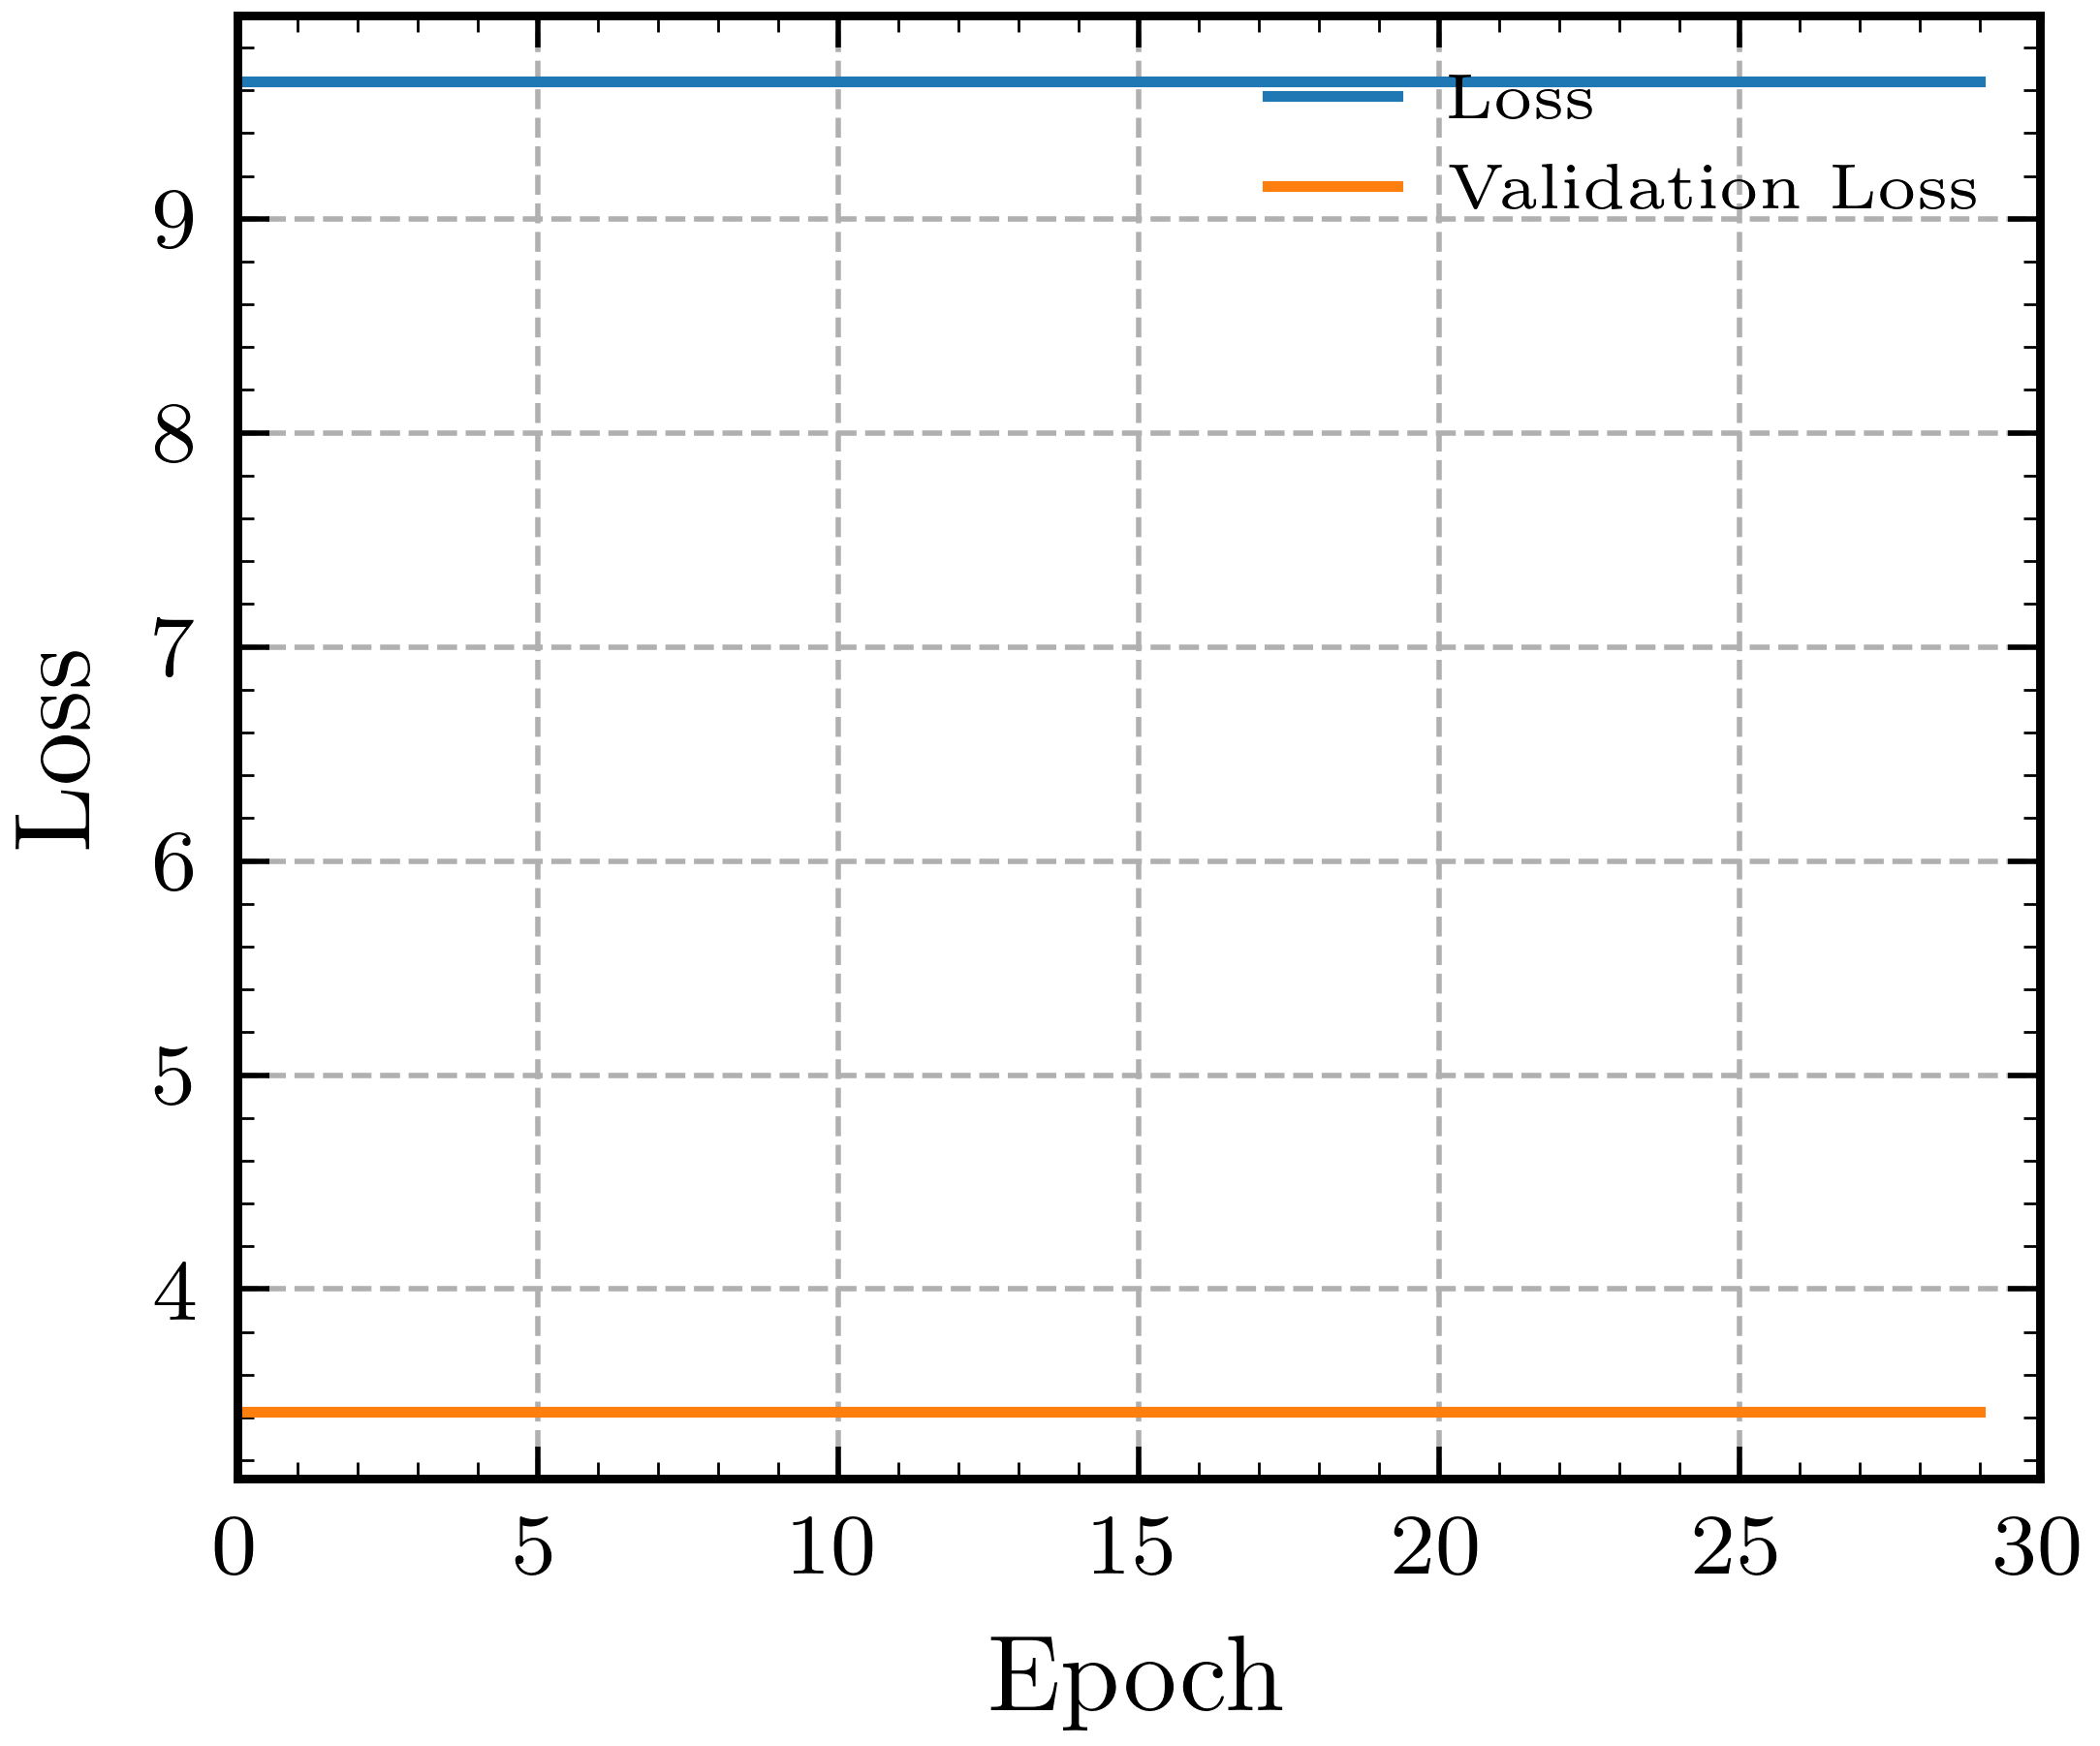

In [282]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(0, N_EPOCHS)
# ax.set_ylim(0, 5)

ax.plot(history.history['loss'], color='tab:blue',
        ls='-', lw=1, label='Loss')
ax.plot(history.history['val_loss'], color='tab:orange',
        ls='-',  lw=1, label='Validation Loss')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig3.pdf')
plt.show()

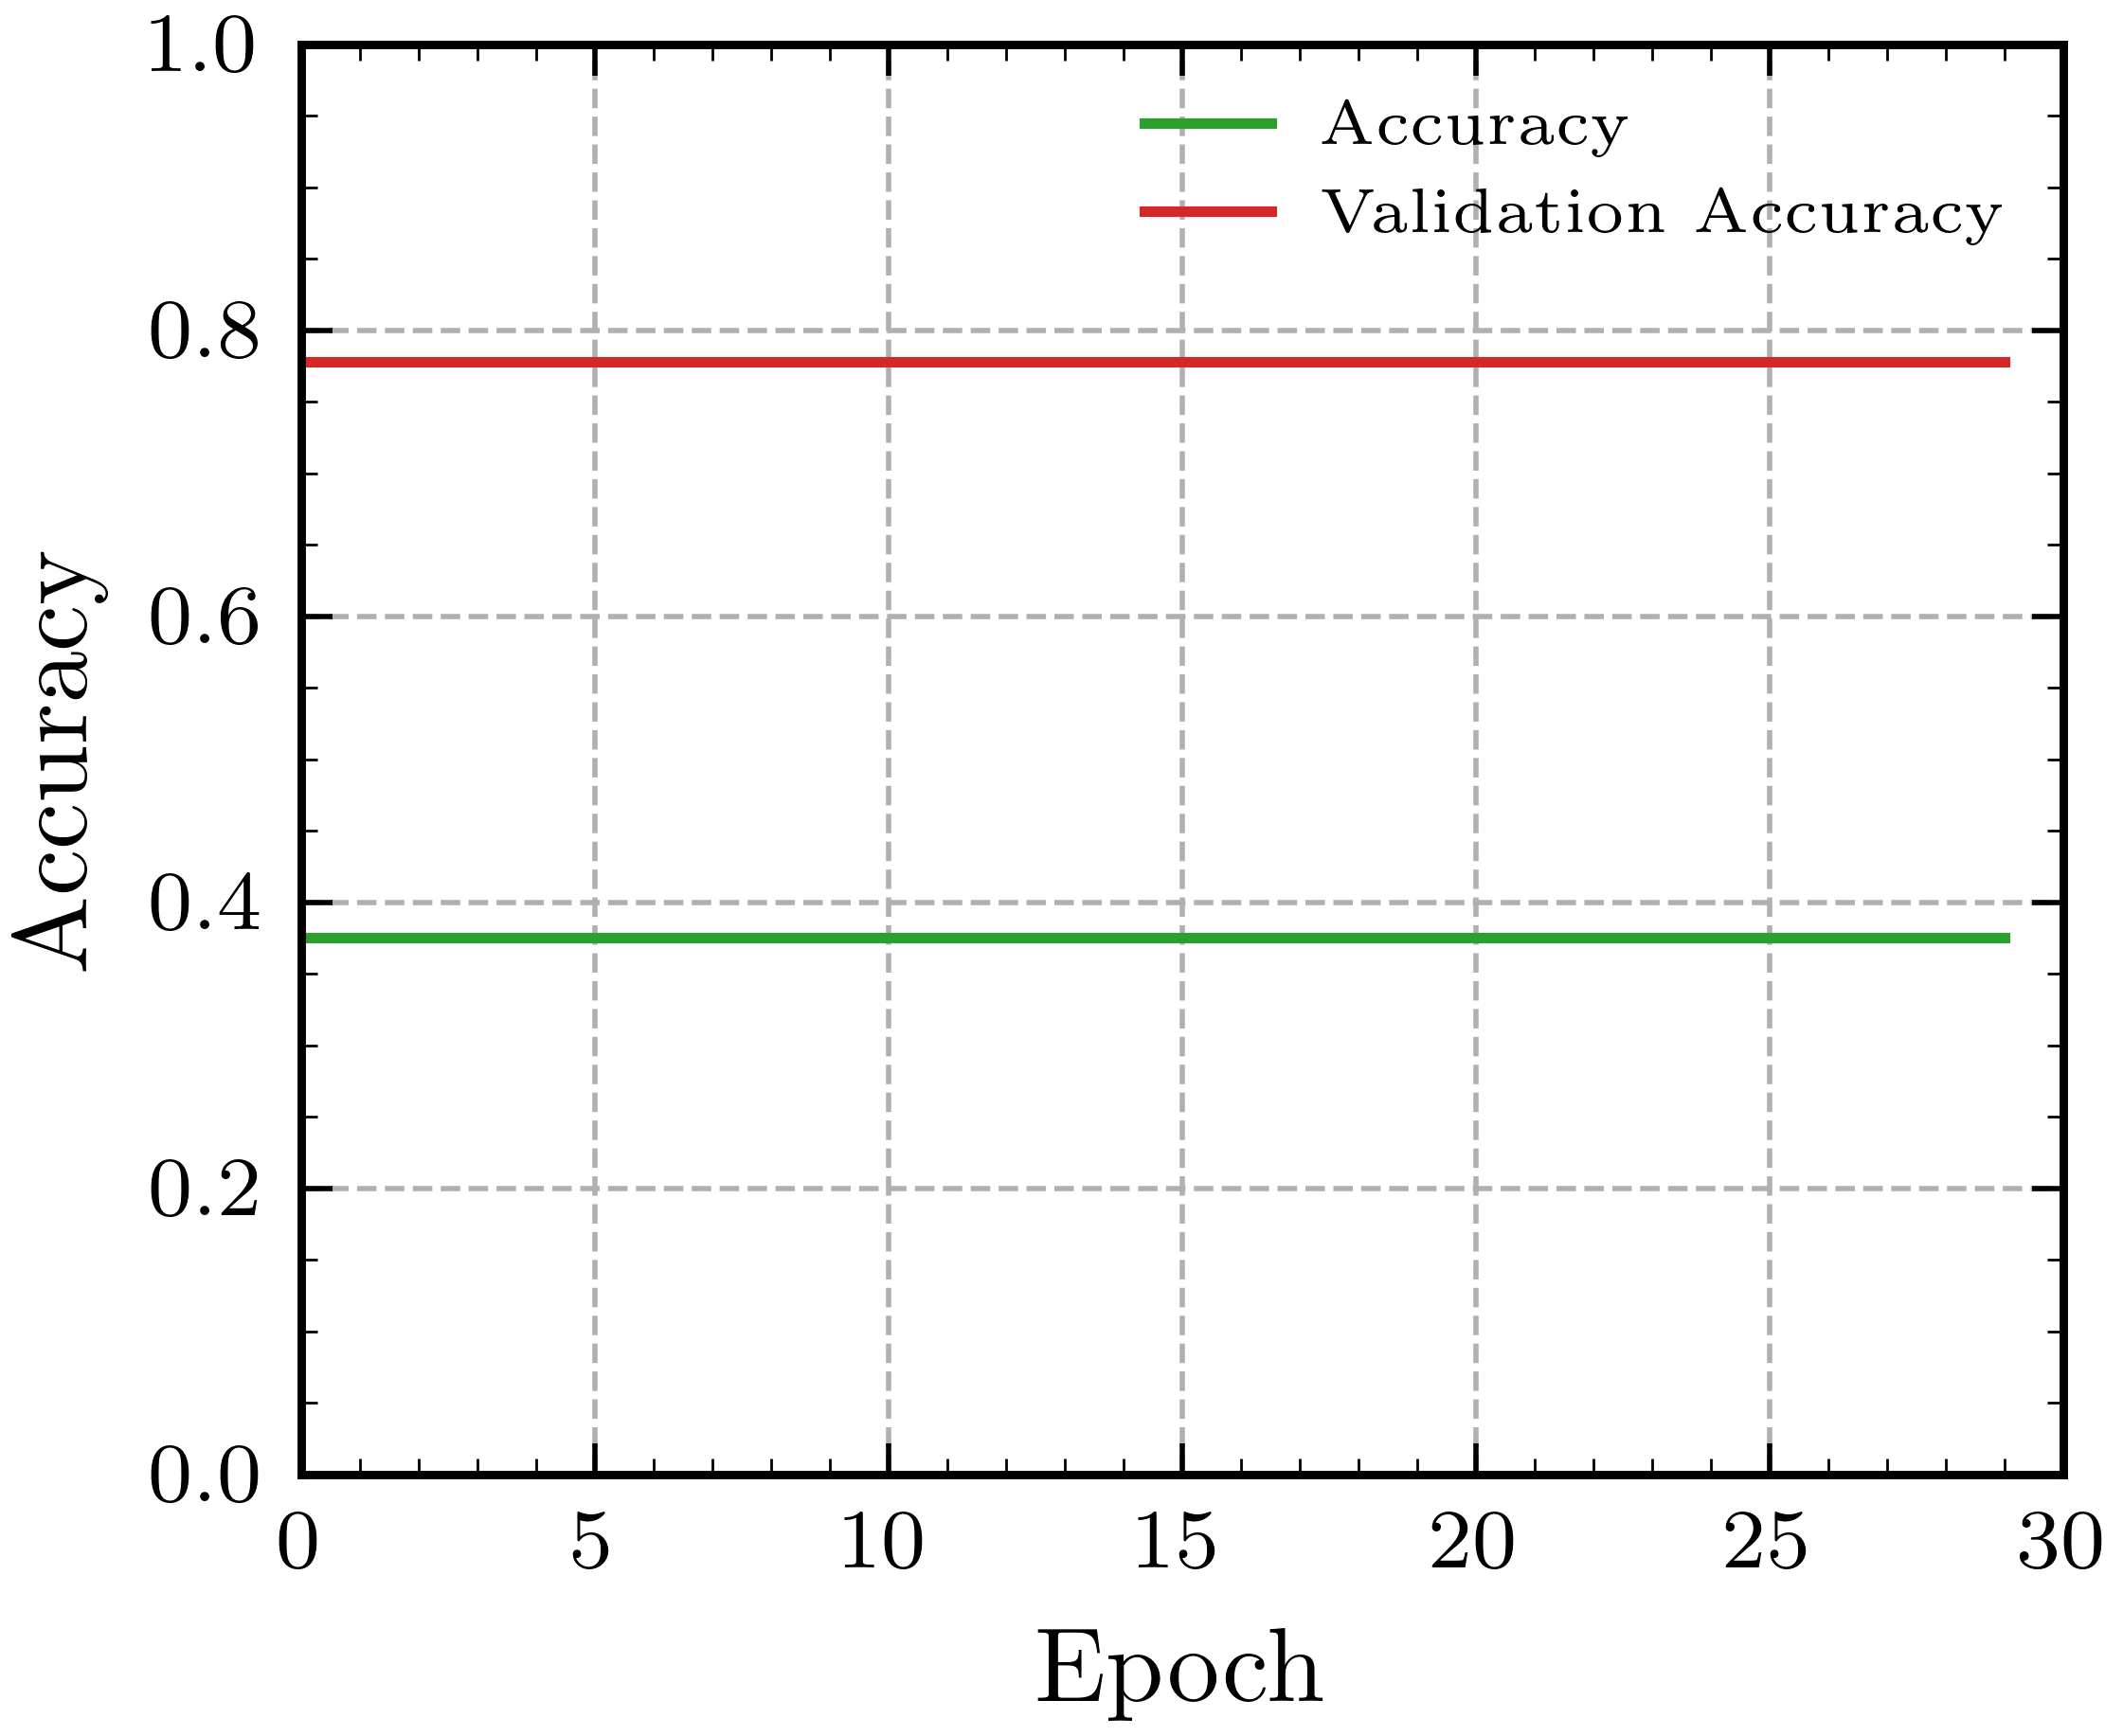

In [283]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_xlim(0, N_EPOCHS)
ax.set_ylim(0, 1)

ax.plot(history.history['accuracy'], color='tab:green',
        ls='-', lw=1, label='Accuracy')
ax.plot(history.history['val_accuracy'], color='tab:red',
        ls='-', lw=1, label='Validation Accuracy')

ax.legend(loc='upper right', framealpha=0)
fig.savefig('../images/tp1_fig4.pdf')
plt.show()

## Classification and Validation

In [284]:
y_pred = model.predict(feats_test)

1/1 [==============================] - 0s 46ms/step


In [285]:
cm = confusion_matrix(np.round(y_pred),
                      target_test,
                      labels=[0., 1.])

In [286]:
# Confusion matrix structure
# TN | FP
# FN | TP

print(cm)

[[7 4]
 [0 0]]


In [287]:
# print(np.diag(cm).sum() / cm.sum())
print(accuracy_score(target_test, np.round(y_pred)))

0.6363636363636364
